In [2]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 9599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9599 kB]
Fetched 9599 kB in 3s (3006 kB/s)      
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package fonts-nanum.
(Reading database ... 35764 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family'] = 'NanumGothic'
import tqdm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans,DBSCAN
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.decomposition import PCA

2023-08-24 06:48:46.151535: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 06:48:46.206721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 06:48:46.208384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 06:48:47.140046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_excel('./특송화물검사결과.xlsx',engine='openpyxl')

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head(3)

,통관목록제출번호,화물관리번호,통관목록제출일자,제출세관부호,제출과코드,목록통관거래유형코드,목록통관배제유형코드,검사결과코드1,검사결과코드2,검사결과코드3,검사결과내용,수입신고불가사유내용,통관목록품명
0,AE01101800000039,18KE02M1BII00040173,20180112,40,55,A,NaN,29,NaN,NaN,혈압측정기,NaN,OMRON 10 SERIES WIRELESS UPPER ARM BLOOD PRESS...
1,SE01872200000713,22HDFC6256I96321324,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 3개,NaN,"HEADPHONESEARPHONES HEADPHONES 1,HEADPHONESEA..."
2,SE01872200000713,22HDFC6256I96322107,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 5개,NaN,HEADSETEARPHONES HEADPHONES 5


In [4]:
len(df)

1048001

In [5]:
ddf = df[df['검사결과코드1'] == 59].copy()

In [6]:
ddf['검사결과내용'] = ddf['검사결과내용'].fillna('')
ddf['total_text'] = ddf['검사결과내용']
ddf['total_text'] = ddf['total_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]","", regex=True)
ddf['total_text'] = ddf['total_text'].str.replace("ㅇ","", regex=True)

In [7]:
# 결측행 삭제
ddf.dropna(axis=0)

,통관목록제출번호,화물관리번호,통관목록제출일자,제출세관부호,제출과코드,목록통관거래유형코드,목록통관배제유형코드,검사결과코드1,검사결과코드2,검사결과코드3,검사결과내용,수입신고불가사유내용,통관목록품명,total_text


In [8]:
# 폰트 설치 여부 및 경로 확인
# import matplotlib.font_manager as fm
# sys_font = fm.findSystemFonts()
# [f for f in sys_font if 'Nanum' in f]

In [9]:
def wordcloud(grp, model):
    g1 = ddf[ddf[model] == grp].groupby('total_text')['total_text'].count().reset_index(name='cnt')
    
    # 결과를 딕셔너리로 변환
    g1_ditc = {}
    for idx, row in enumerate(g1.iterrows()):
        g1_ditc[row[1]['total_text']] = row[1]['cnt']

    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # 한글 글씨체 설정
        background_color='white', # 배경색은 흰색으로 
        colormap='Reds', # 글씨색은 빨간색으로
        mask=None, # 워드클라우드 모양 설정
        width=800, height=800 # 이미지 크기 설정
    ).generate_from_frequencies(g1_ditc)
    
    # 사이즈 설정 및 출력
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # 차트로 나오지 않게
    plt.title(str(grp) +'번 그룹 WordCloud')
    plt.savefig(str(model)+ '_' + str(grp) +'.png', facecolor='#eeeeee')
    plt.show()

    print('---' * 30)

In [10]:
okt = Okt() # 형태소 분석기 객체 생성
noun_list = []
for content in tqdm.tqdm(ddf['total_text'].fillna('')): 
    nouns = okt.nouns(content) # 명사만 추출하기, 결과값은 명사 리스트
    noun_list.append(nouns)

100%|██████████| 75103/75103 [01:51<00:00, 672.10it/s] 


In [11]:
ddf['nouns'] = noun_list

In [12]:
# Word2Vec 학습
model = Word2Vec(sentences = noun_list, vector_size = 100, window = 5, min_count = 1, workers = 4, sg = 0)

In [13]:
# ddf['nouns']의 값을 하나씩 꺼내서 word2vec 벡터화하고 문장의 단어 벡터를 평균내서 결과를 반환
vectors = ddf['nouns'].apply(lambda x: np.array(np.mean([model.wv[w] for w in x if w in model.wv], axis=0)))

ddf['pad_vectors'] = vectors

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [14]:
# NaN 값을 제거합니다.
ddf = ddf.dropna(subset=['pad_vectors'])

In [15]:
# 비원진 값을 0으로 대입하여 최대크기(100차원) 벡터길이로 모든 자료를 맞춥니다.
max_len = max([len(v) for v in ddf['pad_vectors'] if isinstance(v, np.ndarray)])
pad_vectors = [np.pad(v, (0, max_len - len(v)), 'constant') for v in ddf['pad_vectors'] if isinstance(v, np.ndarray)]
ddf['pad_vectors'] = pad_vectors

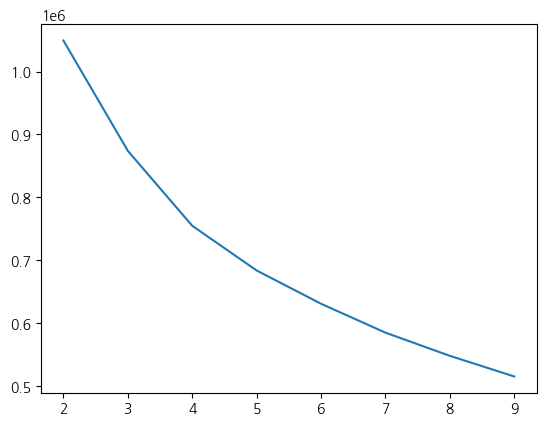

In [16]:
# 군집수 시뮬레이션
itr = []
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(pad_vectors)
    itr.append(km.inertia_)
    
plt.plot(range(2,10), itr)
plt.show()

In [17]:
# 2차원 배열 형태로 변환합니다.
X = np.array(pad_vectors)
# KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)

# 군집 결과를 확인합니다.
labels = kmeans.labels_
ddf['kmeans'] = labels

In [18]:
ddf['kmeans'].value_counts()

3    22792
0    19456
1    16522
2    16196
Name: kmeans, dtype: int64

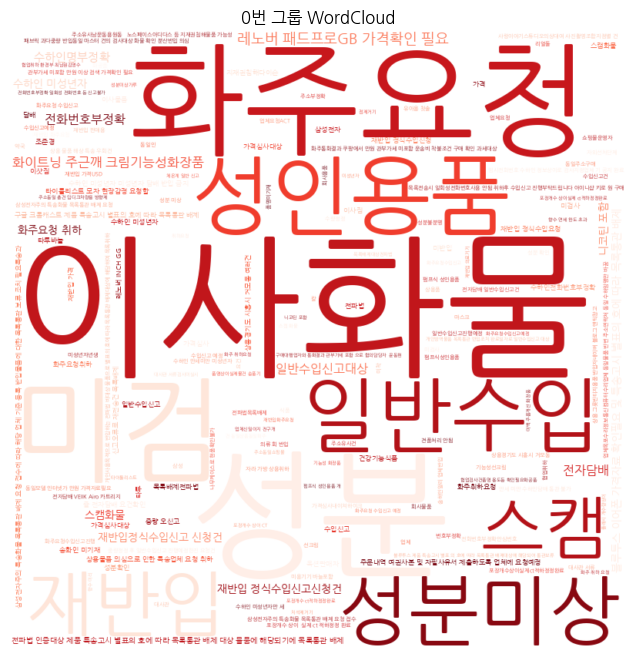

------------------------------------------------------------------------------------------


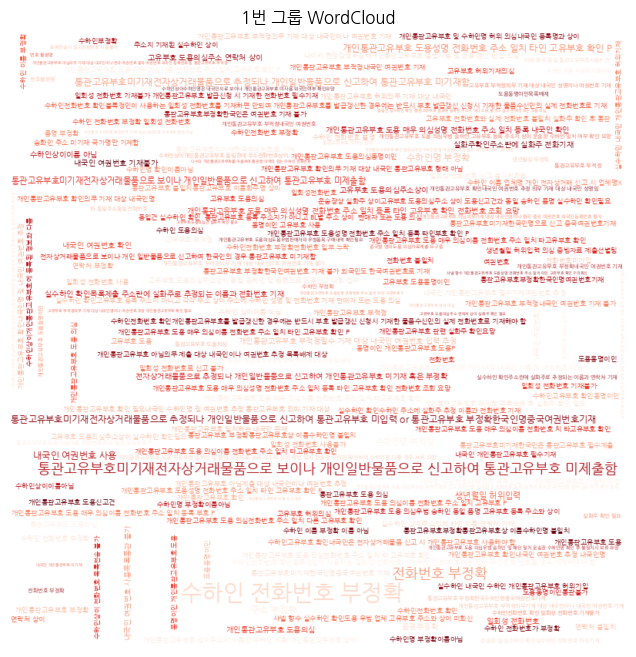

------------------------------------------------------------------------------------------


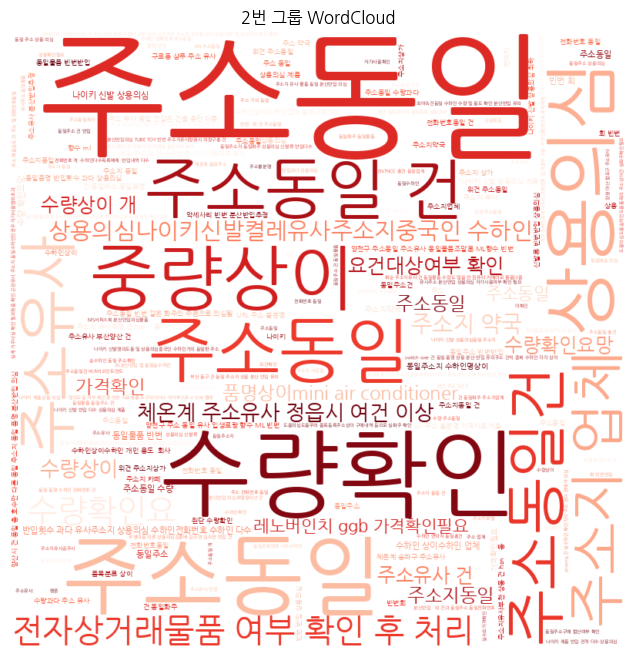

------------------------------------------------------------------------------------------


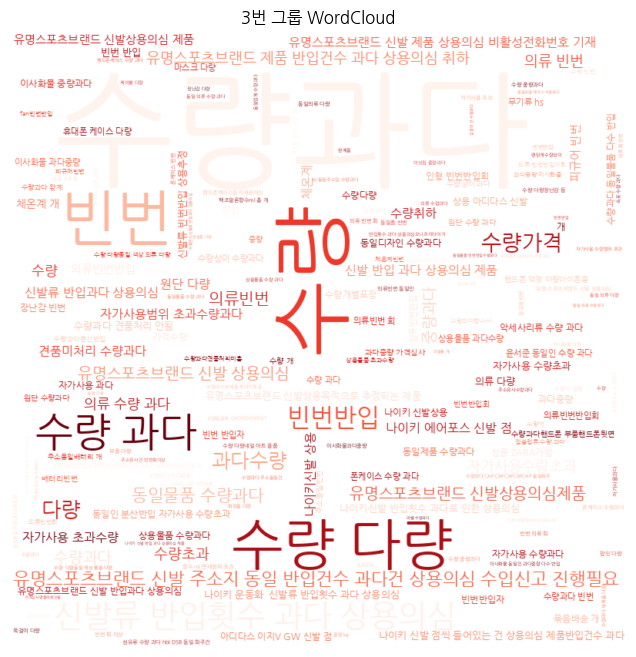

------------------------------------------------------------------------------------------


In [19]:
# 그룹별 워드클라우드 시각화
for i in range(ddf['kmeans'].max()+1):
    wordcloud(i,'kmeans')

In [50]:
# DBSCAN : 인접한 데이터를 클러스터링

X = np.array(pad_vectors) # Normalizer를 이용해 변환된 벡터
# eps 그룹핑할 최대 반경거리
# min_samples 그룹핑한 반경안의 최소 샘플 갯수
model = DBSCAN(eps=2.2,min_samples=300)

# 거리 계산 식으로는 Cosine distance를 이용
model.fit(X)
result = model.fit_predict(X)

In [51]:
ddf['dbscan'] = result

In [52]:
np.unique(ddf['dbscan'])

array([-1,  0,  1,  2,  3,  4])

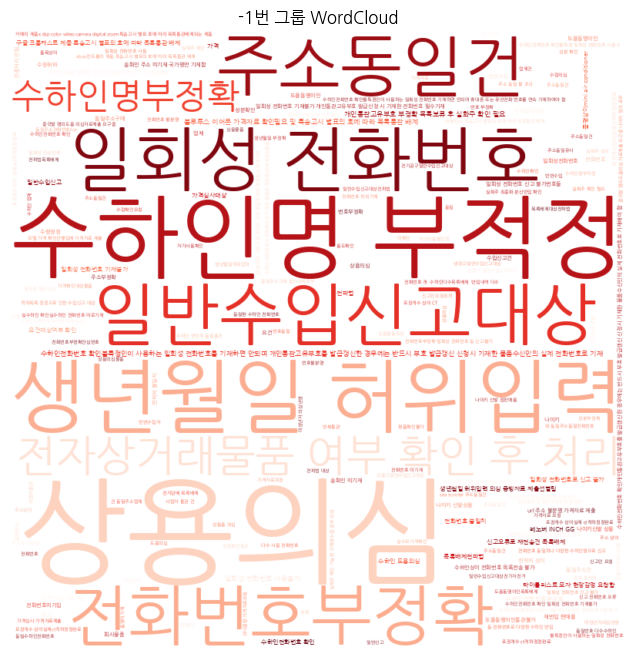

------------------------------------------------------------------------------------------


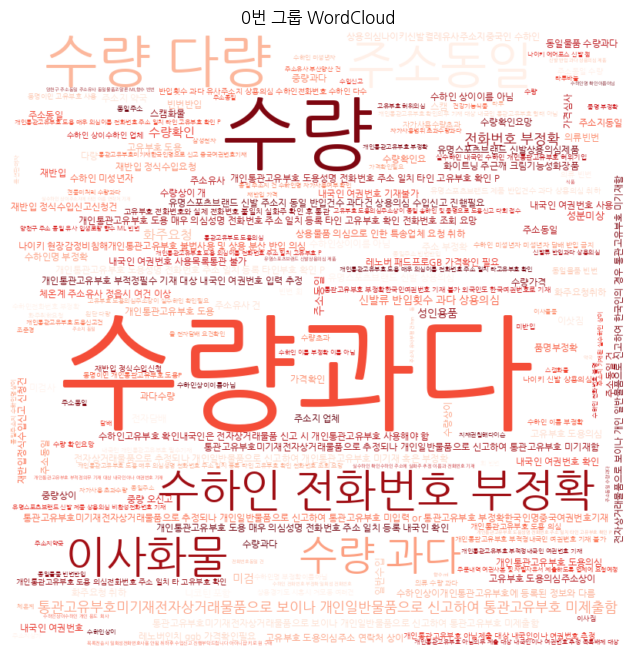

------------------------------------------------------------------------------------------


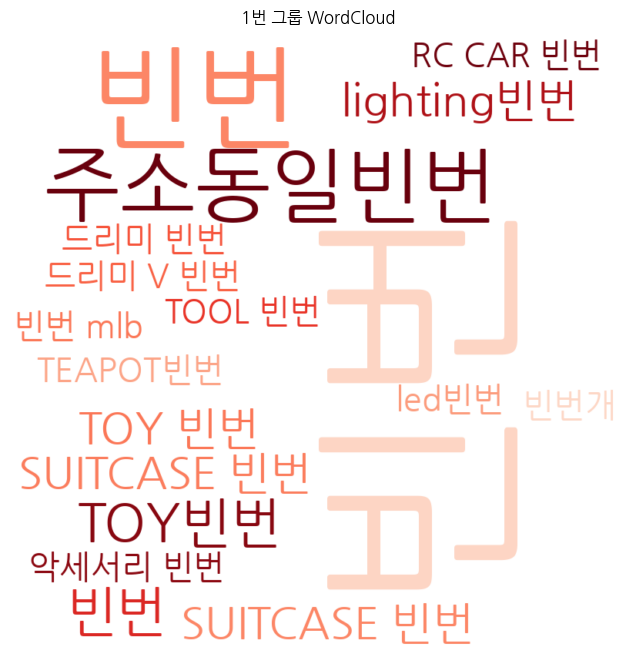

------------------------------------------------------------------------------------------


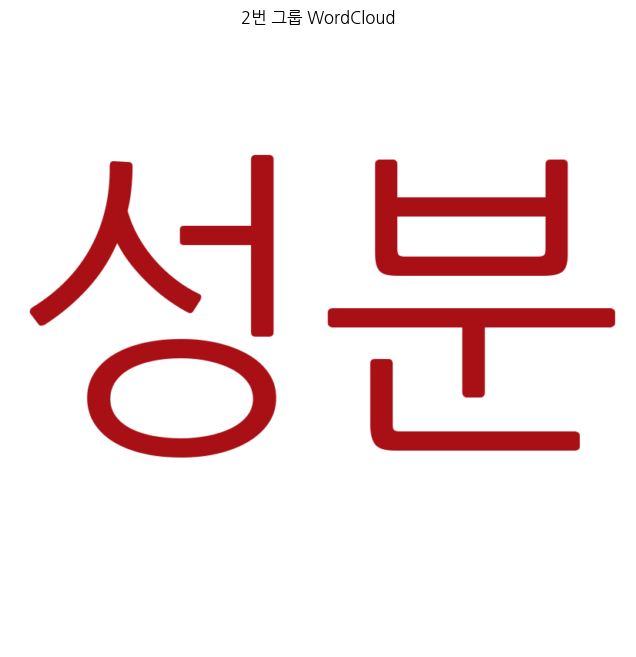

------------------------------------------------------------------------------------------


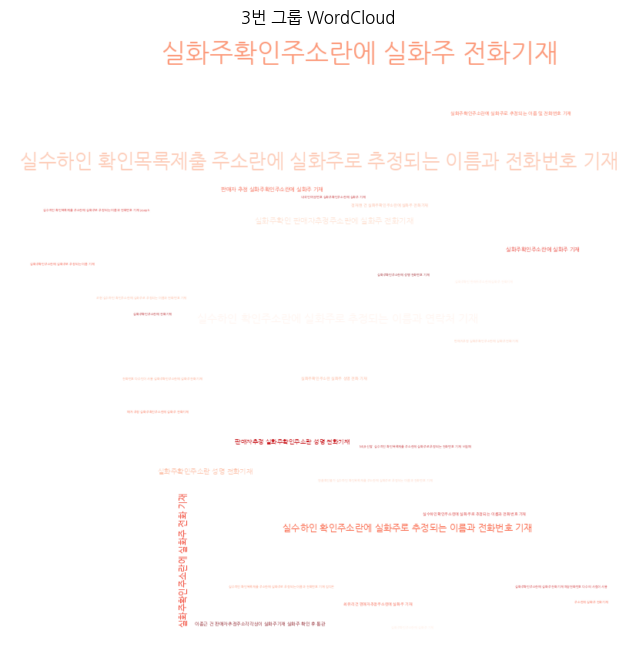

------------------------------------------------------------------------------------------


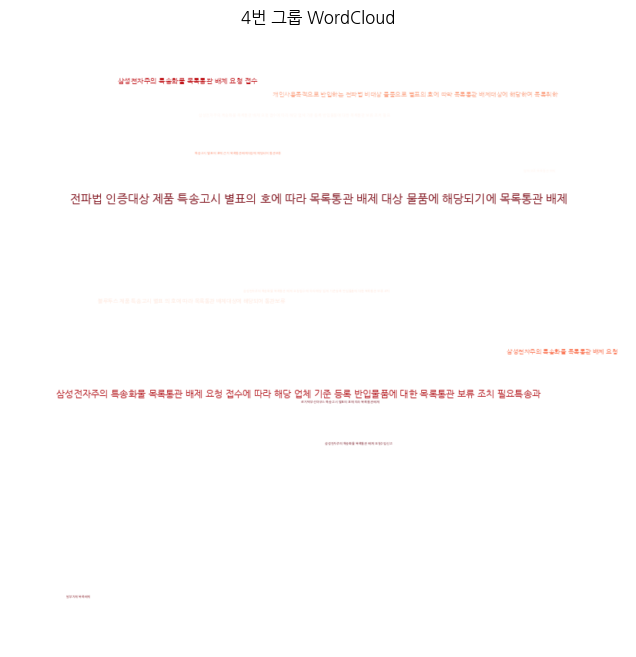

------------------------------------------------------------------------------------------


In [53]:
# 그룹별 워드클라우드 시각화
for i in range(-1, ddf['dbscan'].max()+1):
    wordcloud(i,'dbscan')

In [54]:
ddf.to_excel('./특송화물검사결과_비지도결과.xlsx',index=False,engine='openpyxl')